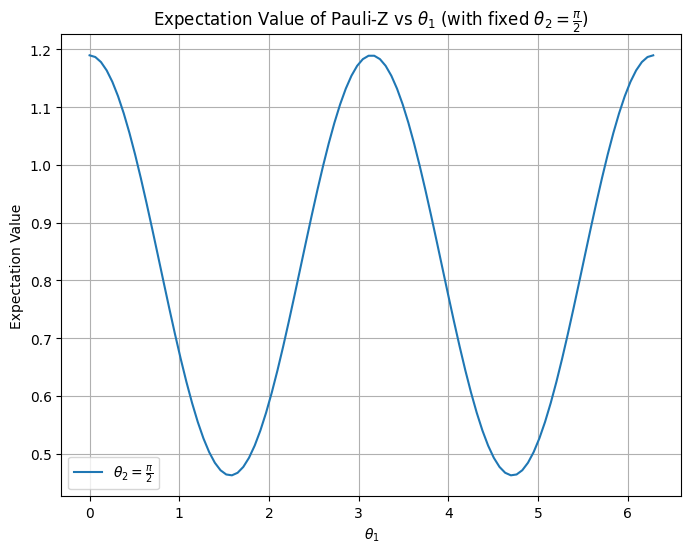

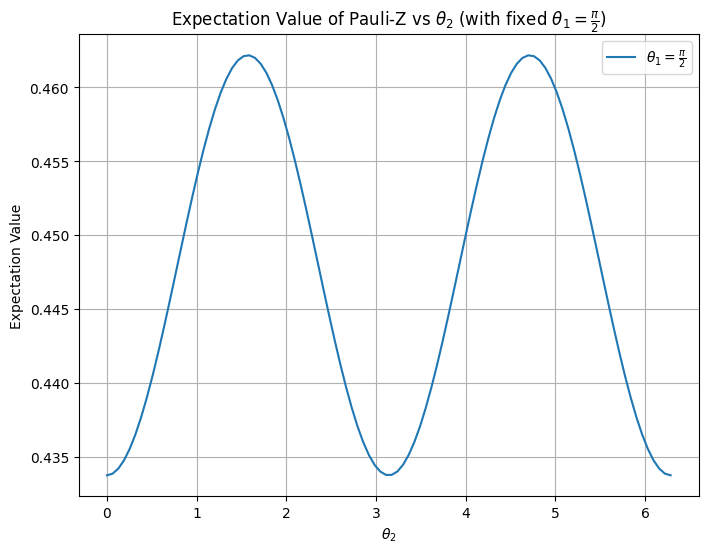

In [10]:
import numpy as np
from scipy.linalg import expm
import matplotlib.pyplot as plt

# Define Pauli matrices
pauli_z = np.array([[1, 0], [0, -1]])
pauli_x = np.array([[0, 1], [1, 0]])

# Define the initial state , 随机的！随机初始状态
initial_state = np.random.rand(2, 1)
initial_state /= np.linalg.norm(initial_state)  # Normalize the state

# Define the unitary evolution U(θ1, θ2) using matrix exponentials
def unitary_evolution_expm(theta1, theta2):
    # Rotation around Z followed by rotation around X using expm for matrix exponentiation
    rz = expm(1.j * pauli_z * theta1)
    rx = expm(1.j * pauli_x * theta2)
    # Apply both rotations
    return rx @ rz

# Define the function to calculate the expectation value <psi|M|psi>
def expectation_value(theta1, theta2, observable):
    # Apply the unitary evolution to the initial state
    U = unitary_evolution_expm(theta1, theta2)
    final_state = np.dot(U, initial_state)
    # Compute <psi|M|psi>
    expectation = np.vdot(final_state, np.dot(observable, final_state))
    return np.real(expectation)


M = np.random.rand(2, 2)  # Random matrix for testing
M = (M + M.T.conj()) * 0.5  # Ensure M is Hermitian

# Generate values for theta1 and theta2
theta1_values = np.linspace(0, 2 * np.pi, 100)
theta2_values = np.linspace(0, 2 * np.pi, 100)
# Modify the plotting for each single variable component

# Fix theta2 and plot f(theta1)
fixed_theta2 = np.pi / 2  # Fix theta2 at pi/2
f_theta1 = np.array([expectation_value(t1, fixed_theta2, M) for t1 in theta1_values])

plt.figure(figsize=(8, 6))
plt.plot(theta1_values, f_theta1, label=r'$\theta_2 = \frac{\pi}{2}$')
plt.title('Expectation Value of Pauli-Z vs $\\theta_1$ (with fixed $\\theta_2 = \\frac{\\pi}{2}$)')
plt.xlabel(r'$\theta_1$')
plt.ylabel('Expectation Value')
plt.grid(True)
plt.legend()
plt.show()

# Fix theta1 and plot f(theta2)
fixed_theta1 = np.pi / 2  # Fix theta1 at pi/2
f_theta2 = np.array([expectation_value(fixed_theta1, t2, M) for t2 in theta2_values])

plt.figure(figsize=(8, 6))
plt.plot(theta2_values, f_theta2, label=r'$\theta_1 = \frac{\pi}{2}$')
plt.title('Expectation Value of Pauli-Z vs $\\theta_2$ (with fixed $\\theta_1 = \\frac{\\pi}{2}$)')
plt.xlabel(r'$\theta_2$')
plt.ylabel('Expectation Value')
plt.grid(True)
plt.legend()
plt.show()



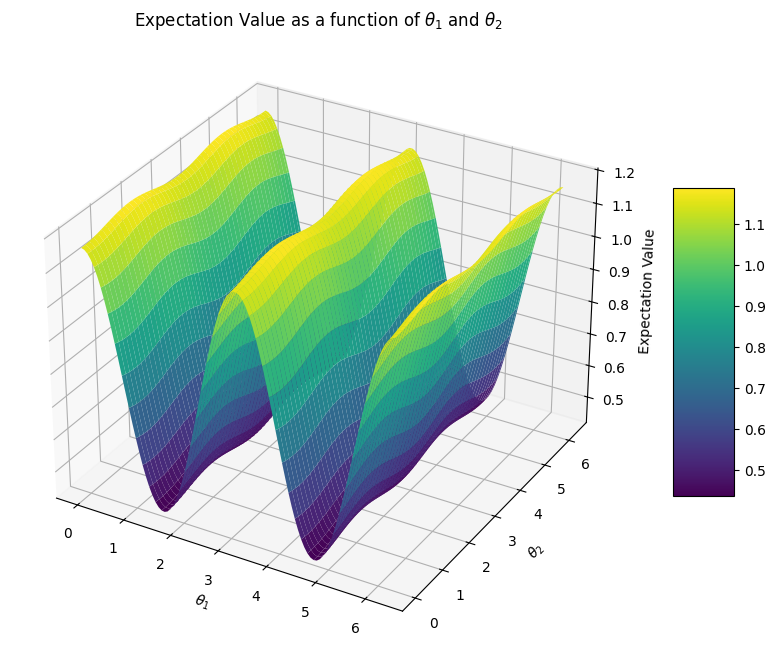